In [1]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

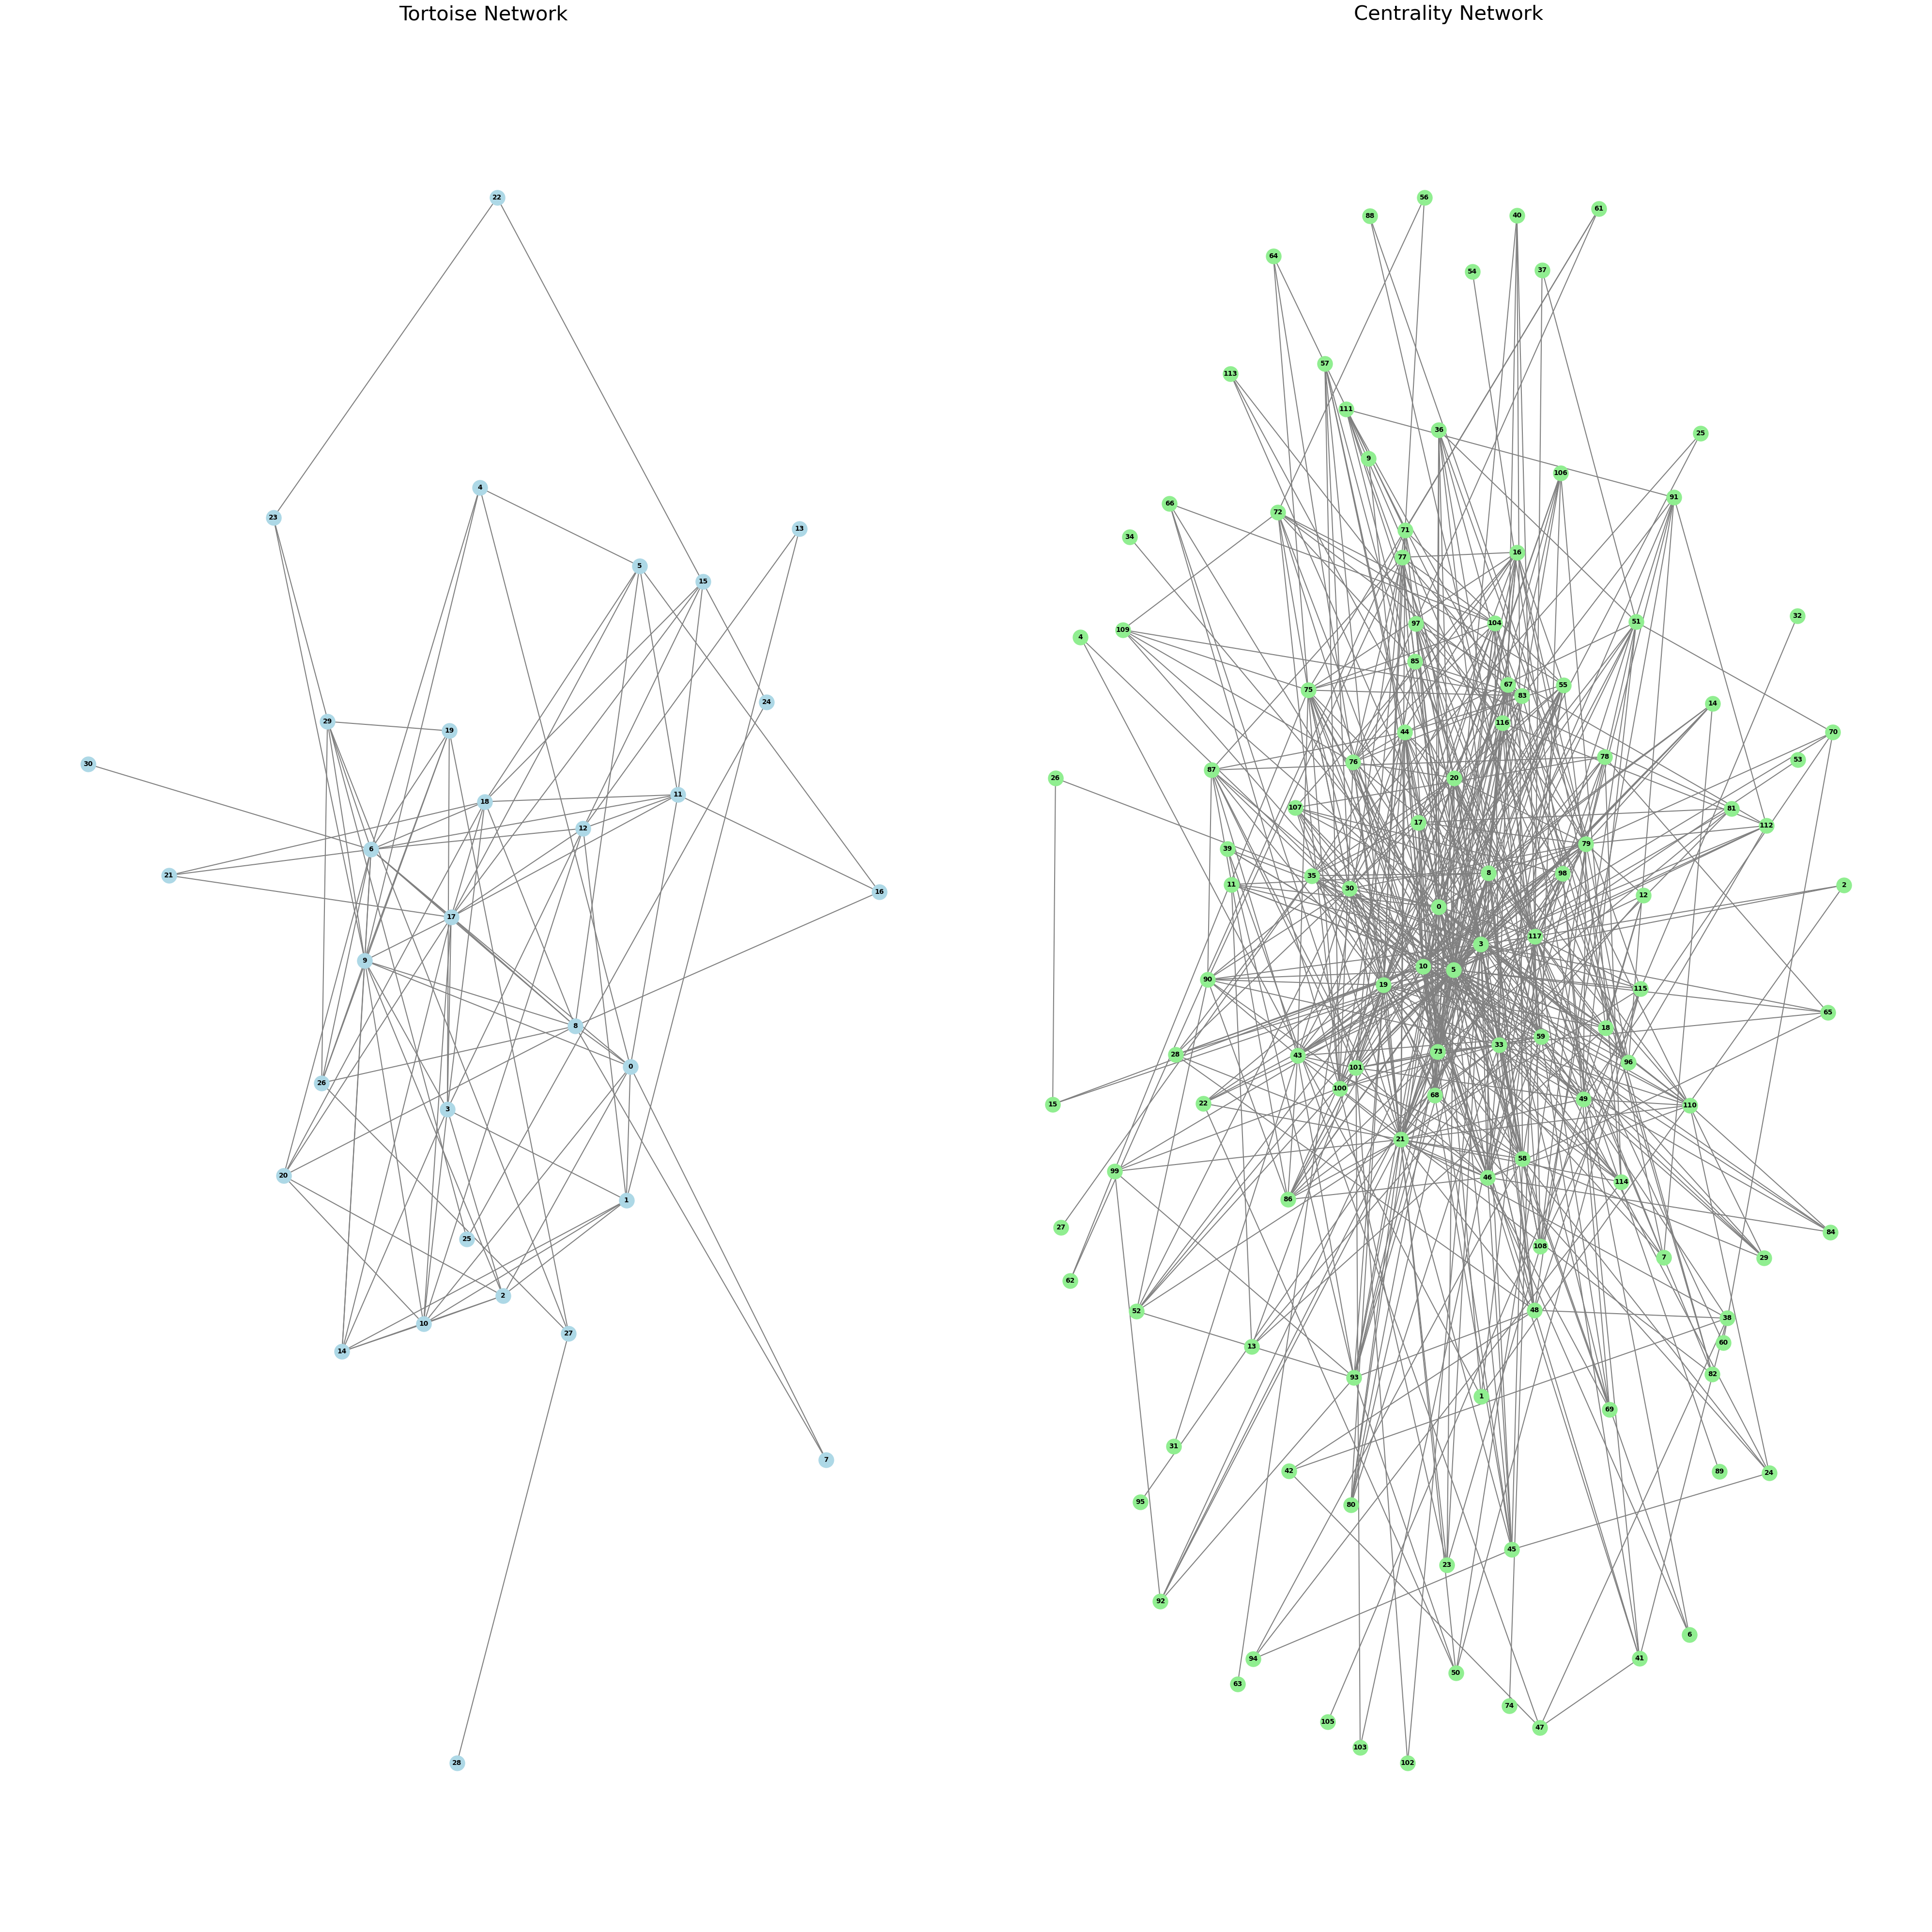

In [2]:
# file_path = '/home/donald/Downloads/ass2/Karate.txt

Centrality = "/home/donald/Downloads/networks_ass2/Centrality.txt"
tortoise = "/home/donald/Downloads/networks_ass2/Tortoise.txt"


# Create a figure with two subplots side by side with larger size and better spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 40))

# Draw the tortoise network on the first subplot with improved styling
G_tortoise = nx.read_weighted_edgelist(tortoise)
pos_tortoise = nx.spring_layout(G_tortoise, k=1, iterations=50)
nx.draw(G_tortoise, pos=pos_tortoise, ax=ax1, 
        node_color='lightblue',
        node_size=500,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        width=1.5)
ax1.set_title('Tortoise Network', fontsize=30, pad=20)

# Draw the centrality network on the second subplot with improved styling
G_centrality = nx.read_weighted_edgelist(Centrality)
pos_centrality = nx.spring_layout(G_centrality, k=1, iterations=50)
nx.draw(G_centrality, pos=pos_centrality, ax=ax2,
        node_color='lightgreen',
        node_size=500,
        with_labels=True,
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        width=1.5)
ax2.set_title('Centrality Network', fontsize=30, pad=20)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)

plt.tight_layout()
plt.show()


In [3]:
A=nx.to_numpy_array(G_centrality)
B=nx.to_numpy_array(G_tortoise)

In [4]:
# Calculate degree vectors for both networks
n_A = len(A)
n_B = len(B)
e_A = np.ones(n_A)
e_B = np.ones(n_B)
k_A = np.dot(A, e_A)
k_B = np.dot(B, e_B)
print("Degree vector for Centrality network:")
print(k_A)
print("\nDegree vector for Tortoise network:")
print(k_B)

Degree vector for Centrality network:
[32.  4.  3.  2. 66.  5. 24. 31. 49.  1.  6.  4.  5.  7.  3. 14. 15.  9.
 36. 21. 39.  6.  5.  2.  2.  7.  6. 21. 29.  1. 15.  1.  8.  6.  5.  6.
  3. 18.  1. 18.  9.  5. 24.  3.  4. 14. 13.  5. 11.  2.  7. 16.  6. 20.
  4. 26.  5.  4. 15. 17.  5.  5.  2. 10.  2.  3.  2.  1.  3. 10. 25. 20.
 18. 12.  9. 26.  6.  5. 13.  4.  5.  9. 13. 11. 12.  8.  5. 13.  3. 10.
 10. 14.  1.  5. 12. 21.  2.  2. 14.  7. 10.  7.  6. 12.  7.  8.  3.  9.
  9.  1.  2.  1. 14. 29.  1.  1.  1.  1.]

Degree vector for Tortoise network:
[ 9.  7.  7.  9.  4.  6. 15.  2. 10. 13.  9.  8.  8.  2.  7.  4.  3. 13.
  9.  6.  6.  3.  3.  2.  2.  2.  6.  4.  1.  5.  1.]


In [5]:
# Calculate triangles and closed walks for both networks
# For Centrality network (A)
u_A, v_A = lg.eigh(A)
print("Centrality Network:")
print(f"Number of triangles: {sum(u_A**3)/6}")
print(f"Number of closed walks of length 4: {sum(u_A**4)}")
print(f"Number of closed walks of length 5: {sum(u_A**5)}")

# For Tortoise network (B)
u_B, v_B = lg.eigh(B)
print("\nTortoise Network:")
print(f"Number of triangles: {sum(u_B**3)/6}")
print(f"Number of closed walks of length 4: {sum(u_B**4)}")
print(f"Number of closed walks of length 5: {sum(u_B**5)}")

Centrality Network:
Number of triangles: 1106.999999999999
Number of closed walks of length 4: 167157.99999999985
Number of closed walks of length 5: 2638569.9999999967

Tortoise Network:
Number of triangles: 96.0
Number of closed walks of length 4: 6045.999999999999
Number of closed walks of length 5: 41539.999999999985


In [6]:
# For Centrality Network (A)
print("Eigenvalues for Centrality Network (A):")
print(np.array2string(u_A, precision=4, separator=', '))

# Find the index of the second largest value from the array (u_A that consists of eigenvalues of A)
sorted_indices_A = np.argsort(u_A)
second_largest_index_A = sorted_indices_A[-2]
print(f"\nIndex of second largest eigenvalue in A: {second_largest_index_A}")
print(f"Second largest eigenvalue in A: {u_A[second_largest_index_A]:.4f}")

# For Tortoise Network (B)
print("\nEigenvalues for Tortoise Network (B):")
print(np.array2string(u_B, precision=4, separator=', '))

# Find the index of the second largest value from the array (u_B that consists of eigenvalues of B)
sorted_indices_B = np.argsort(u_B)
second_largest_index_B = sorted_indices_B[-2]
print(f"\nIndex of second largest eigenvalue in B: {second_largest_index_B}")
print(f"Second largest eigenvalue in B: {u_B[second_largest_index_B]:.4f}")


Eigenvalues for Centrality Network (A):
[-9.6234e+00, -6.8415e+00, -6.0973e+00, -5.5837e+00, -5.0269e+00,
 -4.7955e+00, -4.5820e+00, -4.3102e+00, -3.8705e+00, -3.7788e+00,
 -3.4598e+00, -3.3864e+00, -3.2766e+00, -3.1287e+00, -3.0174e+00,
 -2.8864e+00, -2.8238e+00, -2.7116e+00, -2.4819e+00, -2.3060e+00,
 -2.2599e+00, -2.1947e+00, -2.1241e+00, -2.0514e+00, -1.9931e+00,
 -1.7850e+00, -1.7124e+00, -1.6804e+00, -1.5645e+00, -1.4533e+00,
 -1.4234e+00, -1.3194e+00, -1.2815e+00, -1.2125e+00, -1.1762e+00,
 -1.1504e+00, -1.1154e+00, -1.0597e+00, -1.0000e+00, -9.5682e-01,
 -9.1198e-01, -8.4196e-01, -7.8141e-01, -7.4766e-01, -6.2200e-01,
 -5.4394e-01, -5.4107e-01, -4.7262e-01, -4.3049e-01, -3.7931e-01,
 -3.3241e-01, -3.0899e-01, -2.2710e-01, -1.3111e-01, -9.4582e-02,
 -3.9753e-02, -2.0098e-03, -1.2741e-15, -3.3583e-16, -1.3977e-16,
 -7.0161e-17, -2.1824e-17,  2.0098e-17,  2.2990e-17,  5.8314e-17,
  1.9658e-16,  1.0754e-02,  3.5179e-02,  5.0788e-02,  7.7055e-02,
  1.0150e-01,  1.5237e-01,  1.9828e-

In [7]:
# For Centrality Network (A)
print("Eigenvector for Centrality Network (A):")
print(v_A[:,0])

# For Tortoise Network (B)
print("\nEigenvector for Tortoise Network (B):")
print(v_B[:,0])

Eigenvector for Centrality Network (A):
[-1.93829676e-01  1.42658151e-02  4.42928328e-04  5.68204188e-03
 -3.27315098e-01  5.69975889e-04 -1.99987112e-01 -6.89466611e-02
 -3.04310232e-01  7.16444322e-03  9.42844345e-02  1.01964480e-02
 -4.46770783e-02  8.93476627e-02  4.36310031e-02 -1.60147568e-03
 -1.60620199e-01  1.07904129e-01 -2.55636493e-01 -6.74094820e-02
 -1.74004756e-01  1.06201410e-01  8.80003015e-02 -1.19207528e-02
 -2.36190173e-02  6.14439222e-02  2.05408708e-02 -4.94081575e-02
 -1.95227577e-01  2.01413917e-02  1.83665429e-01 -1.90851960e-02
 -3.80377630e-02 -5.62259811e-03  7.79093696e-03 -3.27159862e-02
 -1.08853085e-02  2.27229347e-02 -2.36120463e-03  1.94989884e-02
  6.54946899e-02 -7.83623156e-02 -1.98471566e-02 -3.44354653e-02
  4.30541603e-03  1.06071404e-01  3.91190198e-02 -2.65608545e-02
  5.81682671e-02 -1.12835433e-02  2.76189583e-02  1.82864817e-01
  8.64657262e-02  1.77235630e-01 -6.23961264e-02  1.61338022e-01
  8.59954160e-02  2.70572759e-02  1.73999506e-01  

In [8]:
# Getting the index of the second largest positive eigenvalue for both networks
filtered_index_array_A = np.where(u_A > 0)[0]
filtered_index_array_B = np.where(u_B > 0)[0]

second_largest_index_A = filtered_index_array_A[-2]
second_largest_index_B = filtered_index_array_B[-2]

print(f"Second largest positive eigenvalue index for Centrality Network: {second_largest_index_A}")
print(f"Second largest positive eigenvalue index for Tortoise Network: {second_largest_index_B}")

Second largest positive eigenvalue index for Centrality Network: 116
Second largest positive eigenvalue index for Tortoise Network: 29


In [10]:
# For Centrality Network (A)
P_A = v_A[:, second_largest_index_A]  # Get eigenvector for A
C1_A = np.where(P_A > 0)[0]  # C1 is indices where P is positive
C2_A = np.where(P_A <= 0)[0]  # C2 is indices where P is non-positive

print("The number of edges within C1 in Centrality Network are: ", len(graph_C1_A.edges()))
print("The number of edges within C2 in Centrality Network are: ", len(graph_C2_A.edges()))


NameError: name 'graph_C1_A' is not defined

In [ ]:
colour_A = np.tile('g', len(G.nodes()))  # Default color is green
colour_A[C1_A] = 'b'  # Turn one partition blue

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos, node_color=colour_A)
plt.title("Centrality Network Partition", fontsize=15)
plt.axis('off')

# For Tortoise Network (B)
P_B = v_B[:, second_largest_index_B]  # Get eigenvector for B
C1_B = np.where(P_B > 0)[0]  # C1 is indices where P is positive
C2_B = np.where(P_B <= 0)[0]  # C2 is indices where P is non-positive
colour_B = np.tile('g', len(G.nodes()))  # Default color is green
colour_B[C1_B] = 'b'  # Turn one partition blue

plt.subplot(1, 2, 2)
nx.draw_networkx(G, pos, node_color=colour_B)
plt.title("Tortoise Network Partition", fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
# Computing the number of edges within each community for both networks

# For Centrality Network (A)
graph_C1_A = G.subgraph(C1_A)
edges_array_C1_A = graph_C1_A.edges()
number_of_edges_C1_A = len(edges_array_C1_A)
print("The number of edges within C1 in Centrality Network are: ", number_of_edges_C1_A)

graph_C2_A = G.subgraph(C2_A)
edges_array_C2_A = graph_C2_A.edges()
number_of_edges_C2_A = len(edges_array_C2_A)
print("The number of edges within C2 in Centrality Network are: ", number_of_edges_C2_A)

# For Tortoise Network (B)
graph_C1_B = G.subgraph(C1_B)
edges_array_C1_B = graph_C1_B.edges()
number_of_edges_C1_B = len(edges_array_C1_B)
print("The number of edges within C1 in Tortoise Network are: ", number_of_edges_C1_B)

graph_C2_B = G.subgraph(C2_B)
edges_array_C2_B = graph_C2_B.edges()
number_of_edges_C2_B = len(edges_array_C2_B)
print("The number of edges within C2 in Tortoise Network are: ", number_of_edges_C2_B)


The number of edges within C1 in Centrality Network are:  0
The number of edges within C2 in Centrality Network are:  0


NameError: name 'C1_B' is not defined

In [14]:
#we are computing the number of edges between the two comunities
edges_C1_C2_list= []
for i,j in G.edges():
    if (i in C1 and j in C2) or (i in C2 and j in C1):
        edges_C1_C2_list.append((i,j))

print("number of edges between two communities(C1 and C2) in Centrality dataset are: " , len(edges_C1_C2_list))
        

number of edges between two communities(C1 and C2) in Centrality dataset are:  26


In [15]:
(np.sum(A[np.ix_(C1,C1)])+np.sum(A[np.ix_(C2,C2)]))/2

67.0

In [16]:
np.sum(A[np.ix_(C1,C2)])

26.0